In [135]:
import torch
import torchvision.models
from torchvision import transforms
from torch import nn
import sys
import numpy as np
import json, random, time, os, base64
import matplotlib.pyplot as plt
from pprint import pprint
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [136]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [114]:
def load_model():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()
    return model

In [115]:
def get_prediction(img, model, confidence=0.5):
    """
    get_prediction
    parameters:
      - img_path - path of the input image
      - confidence - threshold value for prediction score
    method:
      - Image is obtained from the image path
      - the image is converted to image tensor using PyTorch's Transforms
      - image is passed through the model to get the predictions
      - class, box coordinates are obtained, but only prediction score > threshold
        are chosen.
    """
    img = Image.fromarray(img)
    
    tfs = transforms.Compose([transforms.ToTensor()])
    img = tfs(img)
    img = torch.unsqueeze(img,0)
    pred = model(img)
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].detach().numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>confidence]
    if len(pred_t)<1:
        return [], []
    else:
        pred_t = pred_t[-1]
        pred_boxes = pred_boxes[:pred_t+1]
        pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

In [119]:
def object_detection_api(img, model, threshold=0.5, rect_th=3, text_size=1.0, text_th=3): 
    boxes, pred_cls = get_prediction(img, model, threshold)
    for i in range(len(boxes)):
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) 
        # Draw Rectangle with the coordinates 
        cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) 
    # Write the prediction class 
    # display the output image 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.show()

In [120]:
model = load_model()


In [121]:
dataset = json.load(open("/project_data/ramanan/shubham/project/data/WebQA_train_val.json", "r"))

with open("/project_data/ramanan/shubham/project/data/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

389750


Q =  "How many floors are in the building at 575 Broadway?"

A =
['"There are six floors in the building at 575 Broadway."']

------ Positive Evidence ------ 
30201961
30201961 30201961


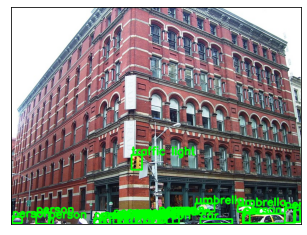

https://commons.wikimedia.org/wiki/File:575_Broadway.jpg
Caption =  575 Broadway


(0.0, 1.0, 0.0, 1.0)

In [172]:
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo']

while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] in Qcate:
        break

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    print(image_id)
    with open("/project_data/ramanan/shubham/project/data/imgs.tsv", "r") as fp:
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = cv2.imdecode(np.frombuffer(base64.b64decode(img_base64), dtype=np.uint8), cv2.IMREAD_COLOR)
    object_detection_api(im, model)
#     ax.imshow(im[:,:,::-1])
#     ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off')

In [57]:
y.shape

torch.Size([1, 3, 200, 400])